In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
import sklearn.cross_decomposition as cv
import sklearn

In [2]:
dataset = fetch_california_housing()
X= dataset['data']
y= dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

In [3]:
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [5]:
X.shape, y.shape

((20640, 8), (20640,))

In [6]:
# Linear Regression
LR = LinearRegression()
LR.fit(X_train,y_train)
train_score_LR = LR.score(X_train,y_train)
print("The train score for LR model is {}".format(train_score_LR))

The train score for LR model is 0.6090156808313738


In [7]:
# Lasso regression model
print("..............Lasso Model............")
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
print("The Train score for lasso model is {}".format(train_score_ls))

..............Lasso Model............
The Train score for lasso model is 0.5488267992849574


In [8]:
# Rigid regression model
print("\nRidge Model..............................................\n")
ridgeReg = Ridge(alpha= 0.1)
ridgeReg.fit(X_train,y_train)
train_score_ridge =ridgeReg.score(X_train,y_train)
print("The Train score for ridge model is {}".format(train_score_ridge))


Ridge Model..............................................

The Train score for ridge model is 0.6090156804624769


In [9]:
#ElasticNet regression model
enet_model = ElasticNet(alpha = 0.1).fit(X_train,y_train)
train_enet_score = enet_model.score(X_train,y_train)

In [10]:
# Testing a model on testing data set
LR_test_score = LR.score(X_test,y_test)
lasso_test_score = lasso.score(X_test,y_test)
Ridge_test_score = ridgeReg.score(X_test,y_test)
enet_test_score = enet_model.score(X_test,y_test)
result = pd.DataFrame({'LR.score':[train_score_LR,LR_test_score],
                       'Lasso score':[train_score_ls,lasso_test_score],
                       'Rigid score':[train_score_ridge,Ridge_test_score],
                       'Enet score': [train_enet_score,enet_test_score]},
                         index = ['Train_score','Test_score'])

In [11]:
print(result)

             LR.score  Lasso score  Rigid score  Enet score
Train_score  0.609016     0.548827     0.609016    0.579716
Test_score   0.594579     0.523638     0.594578    0.557387


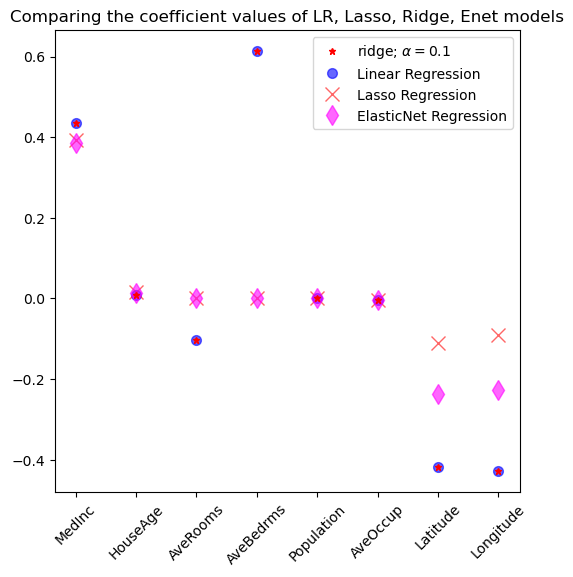

In [12]:
# lets plot the cooeficient for both the linear and ridge models
plt.figure(figsize = (6,6))
plt.plot(dataset.feature_names,ridgeReg.coef_,alpha=1,linestyle='none',
         marker= '*',markersize=5,color='red',label=r'ridge; $\alpha = 0.1$',zorder=7)

plt.plot(dataset.feature_names,LR.coef_,alpha=0.6,linestyle='none',
         marker= 'o',markersize=7,color='blue',label='Linear Regression')

plt.plot(dataset.feature_names,lasso.coef_,alpha=0.6,linestyle='none',
         marker= 'x',markersize=10,color='red',label='Lasso Regression')

plt.plot(dataset.feature_names,enet_model.coef_,alpha=0.6,linestyle='none',
         marker= 'd',markersize=10,color='magenta',label='ElasticNet Regression')
plt.xticks(rotation = 45)
plt.title('Comparing the coefficient values of LR, Lasso, Ridge, Enet models')
plt.legend()
plt.show()



In [13]:
# Using Cross Validation
from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV

we may need to try out different alpha values to find the optimal constraints value. for this case , we can use the cross validation model in the sklearn package.this will try out different combinations of alpha values and the choose the best model

##Lasso Cross Validation

In [16]:
# using the linear CV model
from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV
#lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0001,0.0002,0.0001,0.0009,0.002,0.003,0.0035,0.0003,0.01,0.1,1,10], random_state=10).fit(X_train, y_train)
# score 
print(f'training score:{lasso_cv.score(X_train,y_train)}')
print(lasso_cv.alpha_)

training score:0.6088668691740275
0.002


Ridge Cross Validation

In [18]:
# using the ridge CV model
from sklearn.linear_model import RidgeCV
#Ridge Cross validation
ridge_cv = RidgeCV(alphas = [0.0001,0.002,0.001,0.01,0.02,0.1,1,10,10.5,11,12,15,17,19,50,100,150]).fit(X_train, y_train)
# score 
print("The Train score for ridge model is {}".format(ridge_cv.score(X_train,y_train)))
print(ridge_cv.alpha_)

The Train score for ridge model is 0.6087460107958624
100.0


In [19]:
# using the ElasticNet CV model
from sklearn.linear_model import ElasticNetCV

# ElasticNetCV cross validation
ElasticNet_cv = ElasticNetCV(alphas = [0.0001, 0.001,0.002,0.0025,0.003,0.035,0.01,0.1,1,10]).fit(X_train, y_train)

# score
print("The Train score for elasticNetCV model is {}".format(ElasticNet_cv.score(X_train, y_train)))
ElasticNet_cv.alpha_

The Train score for elasticNetCV model is 0.6088376784780601


0.003

In [20]:
np.log(4)

1.3862943611198906

In [21]:
# generating log space random values
alpha = np.logspace(-4,-1,10)
np.empty_like(alpha)
print(alpha)

[0.0001     0.00021544 0.00046416 0.001      0.00215443 0.00464159
 0.01       0.02154435 0.04641589 0.1       ]


In [22]:
# fitting a lasso regresssor for every alpha value
alphas =np.logspace(-4,-1,10)
#print (alphas)
scores = np.empty_like(alphas)

for i,a in enumerate(alphas):
#    print(i,a)
    lasso = Lasso()
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    scores[i] = lasso.score(X_test, y_test)

print(scores)
            
    

[0.59454473 0.59450471 0.59441549 0.59420946 0.59370145 0.59230927
 0.58792785 0.57907547 0.5666033  0.52363775]


0.03432308935225837


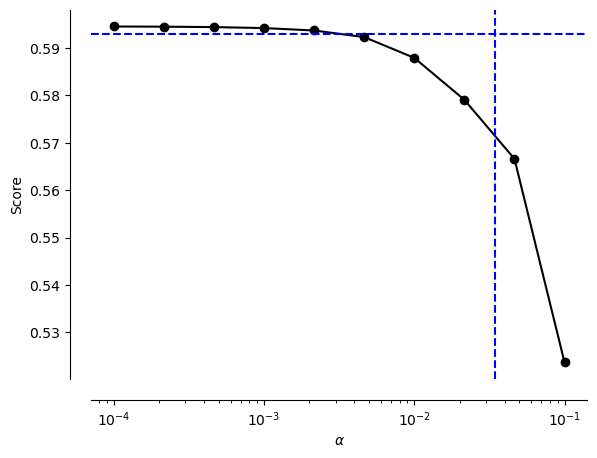

In [23]:
#comparing aplha values with scores
lassocv = LassoCV(random_state=0)
lassocv.fit(X_train,y_train)
lassocv_score = lassocv.score(X_train, y_train)
lassocv_alpha = lassocv.alpha_
print(lassocv_alpha)
# print('CV',lassocv.coef_)
plt.plot(alphas, scores, '-ko')
plt.axhline(lassocv_score, color='b', ls='--')
plt.axvline(lassocv_alpha, color='b', ls='--')
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')
plt.xscale('log')
sns.despine(offset=15)

the operations using the ElasticNetCV method to find the optimum lambda value.

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
alphas = np.logspace(-3, 1, num=30)

model = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas))
cv_results = cross_validate(model, X_train, y_train, return_estimator=True, n_jobs=2)
print(cv_results)

{'fit_time': array([0.08504605, 0.08334351, 0.07601595, 0.0671227 , 0.06792092]), 'score_time': array([0.00099778, 0.00199509, 0.00056696, 0.00353575, 0.00099802]), 'estimator': [Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([1.00000000e-03, 1.37382380e-03, 1.88739182e-03, 2.59294380e-03,
       3.56224789e-03, 4.89390092e-03, 6.72335754e-03, 9.23670857e-03,
       1.26896100e-02, 1.74332882e-02, 2.39502662e-02, 3.29034456e-02,
       4.52035366e-02, 6.21016942e-02, 8.53167852e-02, 1.17210230e-01,
       1.61026203e-01, 2.21221629e-01, 3.03919538e-01, 4.17531894e-01,
       5.73615251e-01, 7.88046282e-01, 1.08263673e+00, 1.48735211e+00,
       2.04335972e+00, 2.80721620e+00, 3.85662042e+00, 5.29831691e+00,
       7.27895384e+00, 1.00000000e+01])))]), Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([1.00000000e-03, 1.37382380e-03, 1.88739182e-

In [26]:
score = cv_results["test_score"]
print(score)
print(f"R2 score: {score.mean():.3f} ± {score.std():.3f}")

[0.63949534 0.60571284 0.61115815 0.56191319 0.60883357]
R2 score: 0.605 ± 0.025


In [27]:
from sklearn.preprocessing import Normalizer

alphas = np.logspace(-3, 1, num=30)
model = make_pipeline(Normalizer(), ElasticNetCV(alphas=alphas))
cv_results = cross_validate(model, X_train, y_train, return_estimator=True, n_jobs=2)
print(cv_results)

{'fit_time': array([0.06578112, 0.06478453, 0.05961466, 0.06342268, 0.05737209]), 'score_time': array([0.0009973 , 0.00099659, 0.00181413, 0.00099683, 0.00099707]), 'estimator': [Pipeline(steps=[('normalizer', Normalizer()),
                ('elasticnetcv',
                 ElasticNetCV(alphas=array([1.00000000e-03, 1.37382380e-03, 1.88739182e-03, 2.59294380e-03,
       3.56224789e-03, 4.89390092e-03, 6.72335754e-03, 9.23670857e-03,
       1.26896100e-02, 1.74332882e-02, 2.39502662e-02, 3.29034456e-02,
       4.52035366e-02, 6.21016942e-02, 8.53167852e-02, 1.17210230e-01,
       1.61026203e-01, 2.21221629e-01, 3.03919538e-01, 4.17531894e-01,
       5.73615251e-01, 7.88046282e-01, 1.08263673e+00, 1.48735211e+00,
       2.04335972e+00, 2.80721620e+00, 3.85662042e+00, 5.29831691e+00,
       7.27895384e+00, 1.00000000e+01])))]), Pipeline(steps=[('normalizer', Normalizer()),
                ('elasticnetcv',
                 ElasticNetCV(alphas=array([1.00000000e-03, 1.37382380e-03, 1.887391

In [28]:
from sklearn.linear_model import ElasticNetCV
enet_cv_model = ElasticNetCV(cv = 10).fit(X_train, y_train)

# if we dont give the lambdas, whats  the alpha?

enet_cv_model.alpha_

0.06864617870451674

In [58]:
!pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable


In [65]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186)

In [69]:
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
print(y)

      quality
0           5
1           5
2           5
3           6
4           5
...       ...
6492        6
6493        5
6494        6
6495        7
6496        6

[6497 rows x 1 columns]


In [73]:
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc